<a href="https://colab.research.google.com/github/nmeena2/astro_assignments/blob/main/405_HW_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline as spline
from astropy import constants as u

## 1. Mass-Radius Diagram

In [ ]:
exo = pd.read_csv("/content/gdrive/MyDrive/exoplanet.eu_catalog.csv", delimiter = ',')

Jmass = exo["mass"]
Jradius = exo["radius"]

#print(Jmass)



(a) [4 pts] Make a scatter plot with mass (in Jovian units) on the x-axis and radius (in
Jovian units) on the y-axis. Draw three curves in the diagram to represent the average
densities of ice (ρ=1500 kg m−3
), rock (ρ=4200 kg m−3
), and iron (ρ=8000 kg m−3
).
Note these values are only rough estimates because all substances will become denser
when compressed. What fraction of these planets is denser than rock? Briefly discuss
the range of compositions of your sample of planets.




Text(0.5, 1.0, 'Mass-Radius Diagram (Exoplanets)')

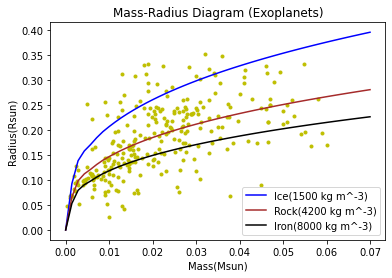

In [ ]:
xradius = np.arange(0, 0.07, 0.0025).tolist()

def density_J(x, Jmass, Jradius):
  d1 = 1.13428
  d2 = 3.17598
  d3 = 6.04949
  y = []
  y1=[]
  y2 = []
  for i in range(len(x)):
    y1.append((x[i]/d2)**(1/3))
    y.append((x[i]/d1)**(1/3))
    y2.append((x[i]/d3)**(1/3))
  return y, y1, y2

curve1 = spline(xradius, density_J(xradius, Jmass, Jradius)[0])
curve2 = spline(xradius, density_J(xradius, Jmass, Jradius)[1])
curve3 = spline(xradius, density_J(xradius, Jmass, Jradius)[2])
jrad = np.linspace(min(xradius), max(xradius), 50)

xcurve1 = curve1(jrad)
xcurve2 = curve2(jrad)
xcurve3 = curve3(jrad)

plt.figure()
plt.plot(Jmass, Jradius, 'y.')
plt.plot(jrad, xcurve1, 'b', label = r'Ice(1500 kg m^-3)')
plt.plot(jrad, xcurve2, 'brown', label = r'Rock(4200 kg m^-3)')
plt.plot(jrad, xcurve3, 'k', label = r'Iron(8000 kg m^-3)')
plt.legend()
plt.xlabel("Mass(Msun)")
plt.ylabel("Radius(Rsun)")
plt.title("Mass-Radius Diagram (Exoplanets)")



(b) [4 pts] Repeat your plot in (a) but now express the mass and radius in Earth units.
Place a symbol at the location in your diagram where the Earth sits. Are most of your
planets denser or less dense than Earth? Show how you arrived at your answer.




Text(0.5, 1.0, 'Mass-Radius Diagram(Exoplanets)')

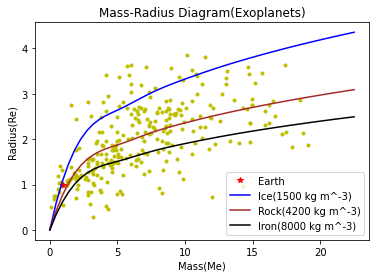

In [ ]:
#Jovian units to Earth units
Emass = (Jmass*1.898E27)/u.M_earth
Eradius = (Jradius*7E7)/u.R_earth

xrad = np.arange(0, 25, 2.5).tolist()

def density_E(x, Emass, Eradius):
  d = 0.27195
  d1 = 0.7615
  d2 = 1.4504
  y = []
  y1 = []
  y2 = []
  for i in range(len(x)):
    y.append((x[i]/d)**(1/3))
    y1.append((x[i]/d1)**(1/3))
    y2.append((x[i]/d2)**(1/3))
  return y, y1, y2

spline1 = spline(xrad, density_E(xrad, Emass, Eradius)[0])
spline2 = spline(xrad, density_E(xrad, Emass, Eradius)[1])
spline3 = spline(xrad, density_E(xrad, Emass, Eradius)[2])

Erad = np.linspace(min(xrad), max(xrad), 50)
Erad1 = spline1(Erad)
Erad2 = spline2(Erad)
Erad3 = spline3(Erad)
###########
plt.figure()
plt.plot(Emass, Eradius, 'y.')
plt.plot(1, 1, 'r*', label = 'Earth')
plt.plot(Erad, Erad1, 'b', label = r'Ice(1500 kg m^-3)')
plt.plot(Erad, Erad2, 'brown', label = r'Rock(4200 kg m^-3)')
plt.plot(Erad, Erad3, 'k', label = r'Iron(8000 kg m^-3)')
plt.legend()

plt.xlabel("Mass(Me)")
plt.ylabel("Radius(Re)")
plt.title("Mass-Radius Diagram(Exoplanets)")

(c) [4 pts] Repeat your plot in (b) but now color each point by the equilibrium temperature
of the planet. To calculate this, assume an albedo of 0.3 and use the following columns
in your table: ‘semi major axis’ (in AU), ‘star radius’ (in R
) and ‘star teff’
(in K). You may need to set the color range manually (e.g. vmin=100 and vmax=1000
in plt.scatter) to get the colors appear well. See this web page for an example of assigning point color using a third column: http://chris35wills.github.io/courses/
PythonPackages_matplotlib/matplotlib_scatter/. Discuss any temperature-related
trends you see in your plot.

Text(0.5, 1.0, 'Mass-Radius Diagram(Exoplanets)')

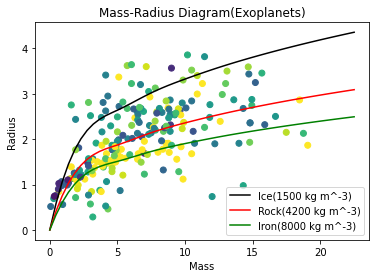

In [ ]:
teff = exo["star_teff"]
semi = exo["semi_major_axis"]*1.5E11
sradius = exo["star_radius"]*6.96E8

def equilibrium(teff, semi, sradius):
  temp = []
  for i in range(len(teff)):
    temp.append(teff[i]*((sradius[i]/(2*semi[i]))**(1/2))*((1-0.3)**(1/4)))
  return temp

plt.figure()
plt.scatter(Emass, Eradius, c=equilibrium(teff, semi, sradius), \
            vmin = 100, vmax = 1000)
plt.plot(Erad, Erad1, 'k', label = r'Ice(1500 kg m^-3)')
plt.plot(Erad, Erad2, 'r', label = r'Rock(4200 kg m^-3)')
plt.plot(Erad, Erad3, 'g', label = r'Iron(8000 kg m^-3)')

plt.legend()
plt.xlabel("Mass")
plt.ylabel("Radius")
plt.title("Mass-Radius Diagram(Exoplanets)")




> There are more yellow dots below the line indicating density of rock. Above the line of Rock, there are mostly green and blue dots. I am going to assume that planets that are more dense have higher equilibrium temperatures.



## 2. Habitable Zone






a. [4 pts] Calculate the heliocentric distance (in AU) of the inner edge of the habitable
zone for our Solar System.

In [ ]:
import numpy as np

A = 0.3         #Albedo
T1 = 230
T2 = 330
Lsun = 3.83E26  #luminosity of sun
sb = 5.67E-8    #steffan boltzmann constant



#T = (Lsun*(1-A))/(np.pi*16*(d^2)*sb)^(1/4)

#solving this for d we have:

#d = (1/(4*T**2))*((Lsun*(1-A))/np.pi*sb)**1/2



#solving for d1 with temperature= T1

d1 = (1/(4*T1**2))*((Lsun*(1-A))/(np.pi*sb))**0.5
print("outer edge of habitable zone is:", d1,"meters", "=", d1/1.496E11, "AU")

outer edge of habitable zone is: 183343820897.63583 meters = 1.2255603001178865 AU


(b) [4 pts] Calculate the same for the outer edge of the habitable zone. Is the Earth
habitable by this definition? Explain.

In [ ]:
#solving for d2 with temperature= T2

d2 = 1/(4*T2**2)*((Lsun*(1-A))/(np.pi*sb))**0.5
print("Inner edge of habitable zone is:", d2,"meters", "=", d2/1.496E11, "AU")

Inner edge of habitable zone is: 89062333567.35478 meters = 0.5953364543272378 AU




>We solved for the inner and outer edges of the habitable zone which are 0.6 AU to 1.2 AU and Earth is at 1 AU which means we are luckily in the habitable zone!



## 3 . Rebound Orbit Integrator (12 pts).

In [ ]:
!pip install rebound

     |████████████████████████████████| 256kB 8.1MB/s 
  Created wheel for rebound: filename=rebound-3.16.0-cp37-cp37m-linux_x86_64.whl size=576400 sha256=8345555dc80dc17c0dbd22fdbc25a6d04b212e8952bb16dd75daf5525e78b8e2
  Stored in directory: /root/.cache/pip/wheels/2a/6f/b0/d498986ecb53a27216150e5e8b1e8cf11cbed16d5e2ac5e38f
Successfully built rebound


In [ ]:
import rebound
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


sim = rebound.Simulation()
sim.units = ('AU', 'days', 'Msun')

# We can add Jupiter and four of its moons by name, since REBOUND is linked to the HORIZONS database.
labels = ["Jupiter", "Io", "Europa","Ganymede","Callisto"]
sim.add(labels)

Searching NASA Horizons for 'Jupiter'... Found: Target body name: Jupiter Barycenter (5).
Searching NASA Horizons for 'Io'... Found: Target body name: Io (501).
Searching NASA Horizons for 'Europa'... Found: Target body name: Europa (502).
Searching NASA Horizons for 'Ganymede'... Found: Target body name: Ganymede (503).
Searching NASA Horizons for 'Callisto'... Found: Target body name: Callisto (504).


In [ ]:
os = sim.calculate_orbits()
print("n_i (in rad/days) = %6.3f, %6.3f, %6.3f" % (os[0].n,os[1].n,os[2].n))
print("P_i (in days)     = %6.3f, %6.3f, %6.3f" % (os[0].P,os[1].P,os[2].P))

n_i (in rad/days) =  3.550,  1.770,  0.879
P_i (in days)     =  1.770,  3.550,  7.151


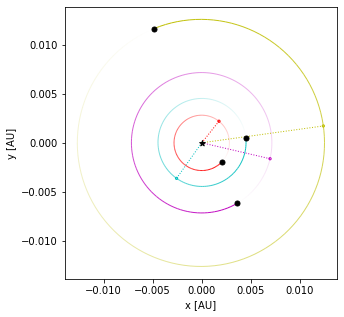

In [ ]:
sim.move_to_com()
fig = rebound.OrbitPlot(sim, unitlabel="[AU]", color=True, periastron=True)

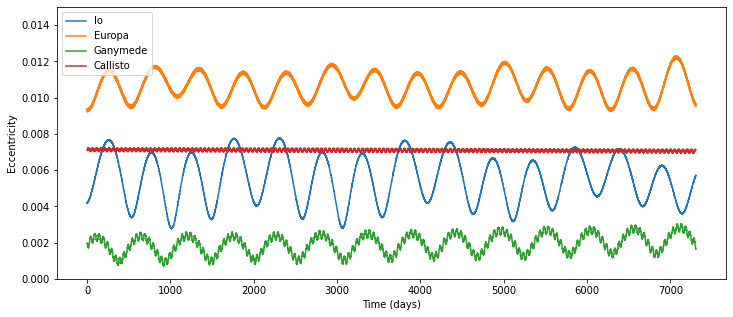

In [ ]:
sim.integrator = "whfast"
sim.dt = 0.05 * os[0].P  # 5% of Io's period
Nout = 100000            # number of points to display
tmax = 20*365.25         # let the simulation run for 20 years
Nmoons = 4

x = np.zeros((Nmoons,Nout))
ecc = np.zeros((Nmoons, Nout))
longitude = np.zeros((Nmoons,Nout))
varpi = np.zeros((Nmoons,Nout))

times = np.linspace(0.,tmax,Nout)
ps = sim.particles

for i,time in enumerate(times):
    sim.integrate(time)
    # note we use integrate() with the default exact_finish_time=1, which changes the timestep near
    # the outputs to match the output times we want.  This is what we want for a Fourier spectrum,
    # but technically breaks WHFast's symplectic nature.  Not a big deal here.
    os = sim.calculate_orbits()
    for j in range(Nmoons):
        x[j][i] = ps[j+1].x
        ecc[j][i] = os[j].e
        longitude[j][i] = os[j].l
        varpi[j][i] = os[j].Omega + os[j].omega


fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)
plt.plot(times,ecc[0],label=labels[1])
plt.plot(times,ecc[1],label=labels[2])
plt.plot(times,ecc[2],label=labels[3])
plt.plot(times,ecc[3],label=labels[4])
plt.ylim(0, 0.015)
ax.set_xlabel("Time (days)")
ax.set_ylabel("Eccentricity")
plt.legend();

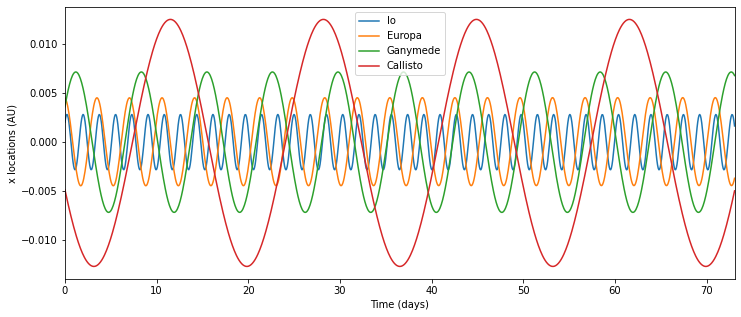

In [ ]:
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)


plt.plot(times,x[0],label=labels[1])
plt.plot(times,x[1],label=labels[2])
plt.plot(times,x[2],label=labels[3])
plt.plot(times,x[3],label=labels[4])
ax.set_xlim(0,0.2*365.25)
ax.set_xlabel("Time (days)")
ax.set_ylabel("x locations (AU)")
ax.tick_params()
plt.legend()


Resonances are identified by looking at the resonant arguments, which are defined as:$$ \theta = (p + q)\lambda_{\rm out} - p \lambda_{\rm in} - q \omega_{\rm out/in}$$where $\lambda_{\rm out}$ and $\lambda_{\rm in}$ are the mean longitudes of the outer and inner bodies, respectively, and $\omega_{\rm out}$ is the longitude of pericenter of the outer/inner body. The ratio of periods is defined as :$$P_{\rm in}/P_{\rm out} ~= p / (p + q)$$

If the resonant argument, $\theta$, oscillates but is constrained within some range of angles, then there is a resonance between the inner and outer bodies. We call this libration of the angle $\theta$. The trick is to find what the values of q and p are. For our case, we can easily see that there are two 2:1 resonances between the moons, so their resonant arguments would follow the function:$$\theta = 2 \lambda_{\rm out} - \lambda_{\rm in} - \omega_{\rm out}$$

To make the plotting easier, we can borrow this helper function that puts angles into 0 to 360 degrees from another example (Fourier analysis & resonances), and define a new one that puts angles into -180 to 180 degrees.

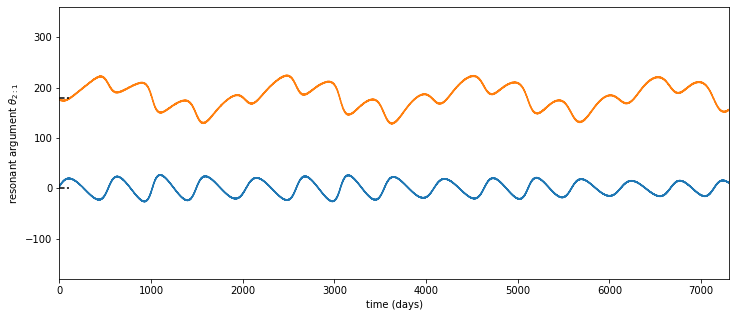

In [ ]:
def zeroTo360(val):
    while val < 0:
        val += 2*np.pi
    while val > 2*np.pi:
        val -= 2*np.pi
    return (val*180/np.pi)

def min180To180(val):
    while val < -np.pi:
        val += 2*np.pi
    while val > np.pi:
        val -= 2*np.pi
    return (val*180/np.pi)

# We can calculate theta, the resonant argument of the 1:2 Io-Europa orbital resonance,
# which oscillates about 0 degrees:
theta = [min180To180(2.*longitude[1][i] - longitude[0][i] - varpi[0][i]) for i in range(Nout)]

# There is also a secular resonance argument, corresponding to the difference in the longitude of perihelions:
# This angle oscillates around 180 degs, with a longer period component.
theta_sec = [zeroTo360(-varpi[1][i] + varpi[0][i]) for i in range(Nout)]

fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)
ax.plot(times,theta)
ax.plot(times,theta_sec) # secular resonance argument
ax.set_xlim([0,20.*365.25])
ax.set_ylim([-180,360.])
ax.set_xlabel("time (days)")
ax.set_ylabel(r"resonant argument $\theta_{2:1}$")
ax.plot([0,100],[180,180],'k--')
ax.plot([0,100],[0,0],'k--')


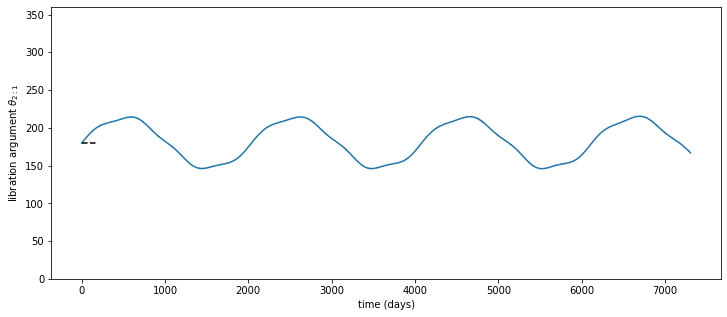

In [ ]:
thetaL = [zeroTo360(-longitude[0][i] + 3.*longitude[1][i] - 2.*longitude[2][i]) for i in range(Nout)]

fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)

ax.plot(times,thetaL)
ax.set_ylim([0,360.])
ax.set_xlabel("time (days)")
ax.set_ylabel(r"libration argument $\theta_{2:1}$")
ax.plot([0,200],[180,180],'k--')

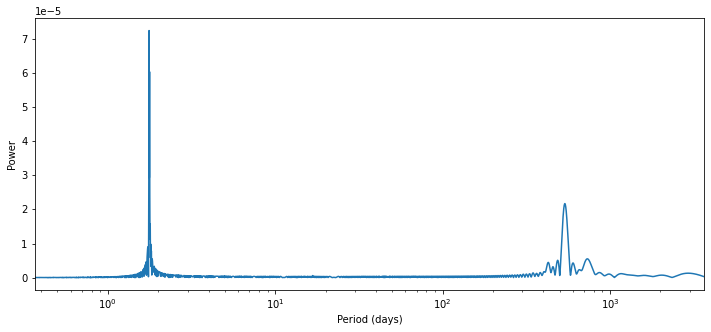

In [ ]:
from scipy import signal
Npts = 3000

# look for periodicities with periods logarithmically spaced between 0.01 yrs and 100 yrs
logPmin = np.log10(0.001*365.25)
logPmax = np.log10(10.*365.25)

# set up a logspaced array from 0.01 to 100 yrs
Ps = np.logspace(logPmin,logPmax,Npts)
# calculate an array of corresponding angular frequencies
ws = np.asarray([2*np.pi/P for P in Ps])

# calculate the periogram (for Io) (using ws as the values for which to compute it)
periodogram = signal.lombscargle(times,x[0],ws)

fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)

# Since the computed periodogram is unnormalized, taking the value A**2*N/4,
# we renormalize the results by applying these functions inversely to the output:
ax.set_xscale('log')
ax.set_xlim([10**logPmin,10**logPmax])
ax.set_xlabel("Period (days)")
ax.set_ylabel("Power")
ax.plot(Ps,np.sqrt(4*periodogram/Nout))

## 4. Project update

I will submit a poll for our presentation. The multiple choice question that we will ask is " What method that we have learned this semester was used to detect the Tabby Star?"

1.   Transit Method(correct answer)
2.   CCD Detectors
3. Radial Velocity
4. Pulsar Timing
5. Doppler Shift


One of the figures that I would like to go through is:

 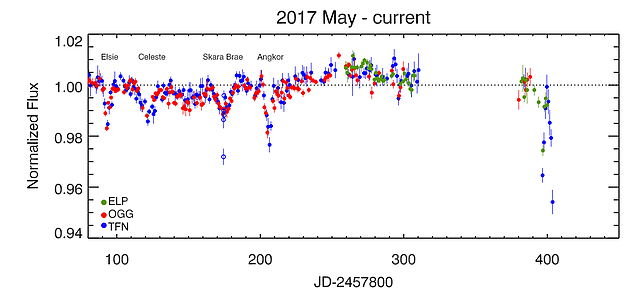

I will discuss how researchers believed these irregular dips were evidence of existing dyson swarm and how new evidence suggests otherwise.